# **Movie Recommendation System**

-------------

## **Objective**

Recommender system that seeks to predict or filter movie preferences according to the user's choices.

## **Data Source**

https://media.geeksforgeeks.org/wp-content/uploads/file.tsv

## **Import Library**

In [1]:
import pandas as pd

## **Import Data**

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

path = 'https://media.geeksforgeeks.org/wp-content/uploads/file.tsv'

## **Describe Data**

In [3]:
df = pd.read_csv(path, sep='\t', names=column_names)

df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/Movie_Id_Titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
data = pd.merge(df, movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [6]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

In [7]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [8]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean()) 

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


## **Data Visualization**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

<Axes: >

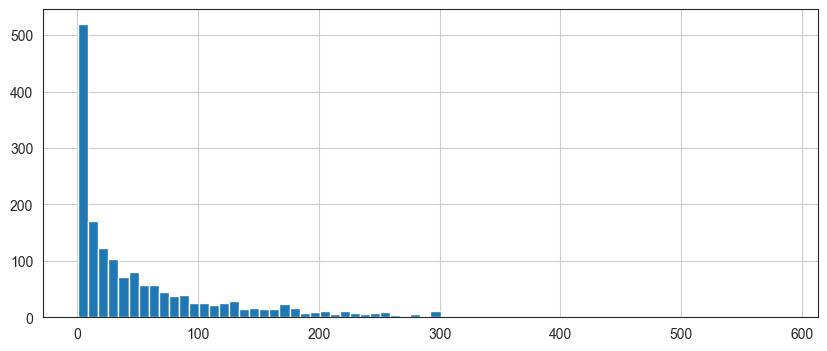

In [12]:
plt.figure(figsize =(10, 4))

ratings['num of ratings'].hist(bins = 70)


<Axes: >

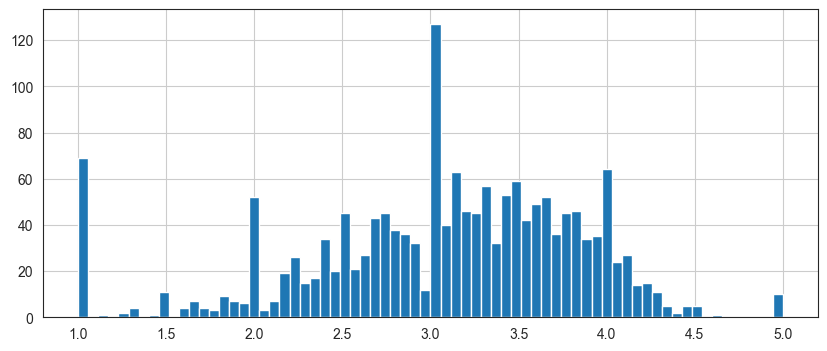

In [13]:
plt.figure(figsize =(10, 4))

ratings['rating'].hist(bins = 70)

## **Data Preprocessing**

In [14]:
moviemat = data.pivot_table(index ='user_id',
              columns ='title', values ='rating')

moviemat.head()

ratings.sort_values('num of ratings', ascending = False).head(10)


,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [15]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [18]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)

corr_starwars.head()

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


## **Prediction**

In [26]:
#Predicting similar movies based on past history
#enter name of movie to find similar movies
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])
corr_liarliar.dropna(inplace = True)

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


## **Explaination**

Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. 
Recommender systems produce a list of recommendations in any of the two ways – 
 

Collaborative filtering: Collaborative filtering looks for users past behaviour as well as similar decision took by other users.

Content-based filtering: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user’s preferences. It recommends items based on the user’s past preferences.